<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-standard-images" data-toc-modified-id="Load-standard-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load standard images</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train / Test Split</a></span></li></ul></li><li><span><a href="#Convert-Large-Images-to-np.arrray" data-toc-modified-id="Convert-Large-Images-to-np.arrray-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert Large Images to np.arrray</a></span></li><li><span><a href="#Load-Sub-Images" data-toc-modified-id="Load-Sub-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Sub-Images</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train / Test Split</a></span></li></ul></li></ul></div>

## Load standard images

In [1]:
# load requirements
import os
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot
from keras.utils import load_img
from numpy import load

In [2]:
# define basepath and create list for each class
base_path = "/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/"
img_folders = []

for path, dirs, files in os.walk(base_path):
    if path != base_path:
        img_folders.append(path)
        
img_folders.sort()
img_folders

['/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/01_TUMOR',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/02_STROMA',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/03_COMPLEX',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/04_LYMPHO',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/05_DEBRIS',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/06_MUCOSA',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE',
 '/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/Kather_texture_2016_image_tiles_5000/08_EMPTY']

In [3]:
# define function to count images per class in each folder
def count_files(dir_path):
    count = 0
    for path, dirs, files in os.walk(dir_path):
        count += len(files)
    return count

In [4]:
# count images / check for imbalance
for path in img_folders:
    parts = path.split('/')
    name = parts[-1]
    print(name, ":", count_files(path))

01_TUMOR : 625
02_STROMA : 625
03_COMPLEX : 625
04_LYMPHO : 625
05_DEBRIS : 625
06_MUCOSA : 625
07_ADIPOSE : 625
08_EMPTY : 625


In [5]:
#function to extract labels as int
def get_labels(path):
    splits = path.split("_")
    label = splits[-1]
    if label == "TUMOR":
        label = 1
    elif label == "STROMA":
        label = 2
    elif label == "COMPLEX":
        label = 3
    elif label == "LYMPHO":
        label = 4
    elif label == "DEBRIS":
        label = 5
    elif label == "MUCOSA":
        label = 6
    elif label == "ADIPOSE":
        label = 8
    elif label == "EMPTY":
        label = 7
    return label

# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

# load images and extract faces for all images and labels in a directory
def load_imgs(img_folders, n_images = 5000):
    images = list()
    lables = list()
    for path in img_folders:
        for filename in listdir(path):
            print(filename)
            # load the image
            label = get_labels(path)
            pixels = load_image(path + "/" + filename)
            # store
            lables.append(label)
            images.append(pixels)
            print(label)
            print(len(images), pixels.shape)
            # stop once we have enough
            if len(images) >= n_images:
                break
    return asarray(images), asarray(lables)

In [6]:
# load images and labels 
all_images, all_lables = load_imgs(img_folders, n_images = 5000)
print('Loaded: ', all_images.shape)
print('Loaded: ', all_lables.shape)
# save in compressed format
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_images.npz', all_images)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_lables.npz', all_lables)

10B61_CRC-Prim-HE-09_022.tif_Row_301_Col_1.tif
1
1 (150, 150, 3)
4D50_CRC-Prim-HE-04_034.tif_Row_1_Col_601.tif
1
2 (150, 150, 3)
12A0_CRC-Prim-HE-07_025.tif_Row_451_Col_1.tif
1
3 (150, 150, 3)
5F7E_CRC-Prim-HE-04_015.tif_Row_1_Col_151.tif
1
4 (150, 150, 3)
7BA4_CRC-Prim-HE-07_006.tif_Row_1_Col_151.tif
1
5 (150, 150, 3)
75A6_CRC-Prim-HE-02_005b.tif_Row_1_Col_151.tif
1
6 (150, 150, 3)
3530_CRC-Prim-HE-08_007.tif_Row_301_Col_301.tif
1
7 (150, 150, 3)
8E9E_CRC-Prim-HE-03_009.tif_Row_451_Col_301.tif
1
8 (150, 150, 3)
161D3_CRC-Prim-HE-01_002.tif_Row_1_Col_1.tif
1
9 (150, 150, 3)
952D_CRC-Prim-HE-02_024.tif_Row_301_Col_301.tif
1
10 (150, 150, 3)
47AF_CRC-Prim-HE-10_010.tif_Row_1_Col_1.tif
1
11 (150, 150, 3)
7332_CRC-Prim-HE-01_042.tif_Row_1_Col_601.tif
1
12 (150, 150, 3)
89F4_CRC-Prim-HE-09_022.tif_Row_1_Col_1.tif
1
13 (150, 150, 3)
16E99_CRC-Prim-HE-09_010.tif_Row_1_Col_601.tif
1
14 (150, 150, 3)
16B00_CRC-Prim-HE-05_008.tif_Row_1_Col_451.tif
1
15 (150, 150, 3)
17EA4_CRC-Prim-HE-05_026.tif_

1
288 (150, 150, 3)
108B3_CRC-Prim-HE-05_013.tif_Row_1_Col_151.tif
1
289 (150, 150, 3)
4F4D_CRC-Prim-HE-07_025.tif_Row_901_Col_301.tif
1
290 (150, 150, 3)
4444_CRC-Prim-HE-06_016.tif_Row_1_Col_301.tif
1
291 (150, 150, 3)
5C70_CRC-Prim-HE-01_020.tif_Row_1_Col_451.tif
1
292 (150, 150, 3)
1BAF_CRC-Prim-HE-03_009.tif_Row_151_Col_151.tif
1
293 (150, 150, 3)
126F8_CRC-Prim-HE-09_025.tif_Row_601_Col_151.tif
1
294 (150, 150, 3)
11BD1_CRC-Prim-HE-02_025.tif_Row_1_Col_751.tif
1
295 (150, 150, 3)
629_CRC-Prim-HE-04_014.tif_Row_1_Col_751.tif
1
296 (150, 150, 3)
35F4_CRC-Prim-HE-02_022.tif_Row_1_Col_151.tif
1
297 (150, 150, 3)
14689_CRC-Prim-HE-02_004.tif_Row_1_Col_301.tif
1
298 (150, 150, 3)
1448B_CRC-Prim-HE-04_005.tif_Row_1_Col_1.tif
1
299 (150, 150, 3)
17DDD_CRC-Prim-HE-05_015.tif_Row_301_Col_151.tif
1
300 (150, 150, 3)
8ACA_CRC-Prim-HE-09_010.tif_Row_301_Col_601.tif
1
301 (150, 150, 3)
175A_CRC-Prim-HE-09_014.tif_Row_1_Col_1.tif
1
302 (150, 150, 3)
396E_CRC-Prim-HE-04_014.tif_Row_1_Col_1051.ti

1
624 (150, 150, 3)
4E0F_CRC-Prim-HE-07_023.tif_Row_301_Col_301.tif
1
625 (150, 150, 3)
14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151.tif
2
626 (150, 150, 3)
1163A_CRC-Prim-HE-05_009b.tif_Row_751_Col_1201.tif
2
627 (150, 150, 3)
118E_CRC-Prim-HE-02_015.tif_Row_301_Col_3601.tif
2
628 (150, 150, 3)
12238_CRC-Prim-HE-09.tif_Row_151_Col_2551.tif
2
629 (150, 150, 3)
100A6_CRC-Prim-HE-02_029.tif_Row_601_Col_301.tif
2
630 (150, 150, 3)
11B53_CRC-Prim-HE-01_019.tif_Row_151_Col_901.tif
2
631 (150, 150, 3)
126E6_CRC-Prim-HE-06_002.tif_Row_1_Col_1951.tif
2
632 (150, 150, 3)
137C3_CRC-Prim-HE-03.tif_Row_601_Col_601.tif
2
633 (150, 150, 3)
11FDE_CRC-Prim-HE-01_019.tif_Row_301_Col_301.tif
2
634 (150, 150, 3)
12C36_CRC-Prim-HE-04_007.tif_Row_1_Col_601.tif
2
635 (150, 150, 3)
12636_CRC-Prim-HE-04.tif_Row_1501_Col_901.tif
2
636 (150, 150, 3)
10E35_CRC-Prim-HE-03_013.tif_Row_1051_Col_901.tif
2
637 (150, 150, 3)
1462B_CRC-Prim-HE-07_014.tif_Row_1051_Col_2701.tif
2
638 (150, 150, 3)
10314_CRC-Prim-HE-03_01

2
969 (150, 150, 3)
12DA6_CRC-Prim-HE-03_001.tif_Row_301_Col_1051.tif
2
970 (150, 150, 3)
111EB_CRC-Prim-HE-04_013.tif_Row_2551_Col_901.tif
2
971 (150, 150, 3)
1424D_CRC-Prim-HE-03_008.tif_Row_1651_Col_901.tif
2
972 (150, 150, 3)
11F4C_CRC-Prim-HE-06_002.tif_Row_301_Col_451.tif
2
973 (150, 150, 3)
1349A_CRC-Prim-HE-03_013.tif_Row_151_Col_1051.tif
2
974 (150, 150, 3)
13A26_CRC-Prim-HE-04_013.tif_Row_2101_Col_301.tif
2
975 (150, 150, 3)
14473_CRC-Prim-HE-03_013.tif_Row_151_Col_901.tif
2
976 (150, 150, 3)
13DED_CRC-Prim-HE-02_015.tif_Row_301_Col_901.tif
2
977 (150, 150, 3)
13702_CRC-Prim-HE-07_009.tif_Row_1_Col_1.tif
2
978 (150, 150, 3)
139C8_CRC-Prim-HE-03_013.tif_Row_1051_Col_451.tif
2
979 (150, 150, 3)
11C94_CRC-Prim-HE-09.tif_Row_451_Col_2551.tif
2
980 (150, 150, 3)
102A2_CRC-Prim-HE-03.tif_Row_601_Col_1351.tif
2
981 (150, 150, 3)
143B8_CRC-Prim-HE-08_004.tif_Row_901_Col_151.tif
2
982 (150, 150, 3)
12895_CRC-Prim-HE-04.tif_Row_1651_Col_1051.tif
2
983 (150, 150, 3)
1000E_CRC-Prim-HE-04

3
1311 (150, 150, 3)
74FE_CRC-Prim-HE-05_012.tif_Row_151_Col_1.tif
3
1312 (150, 150, 3)
54C7_CRC-Prim-HE-05_002a.tif_Row_601_Col_301.tif
3
1313 (150, 150, 3)
10681_CRC-Prim-HE-03_026.tif_Row_451_Col_601.tif
3
1314 (150, 150, 3)
3985_CRC-Prim-HE-03_002.tif_Row_301_Col_2251.tif
3
1315 (150, 150, 3)
15DB3_CRC-Prim-HE-05_009a.tif_Row_601_Col_601.tif
3
1316 (150, 150, 3)
12693_CRC-Prim-HE-06_011.tif_Row_1_Col_901.tif
3
1317 (150, 150, 3)
15702_CRC-Prim-HE-06_007.tif_Row_301_Col_301.tif
3
1318 (150, 150, 3)
6515_CRC-Prim-HE-10_004.tif_Row_451_Col_1.tif
3
1319 (150, 150, 3)
15E4C_CRC-Prim-HE-03_002.tif_Row_451_Col_1201.tif
3
1320 (150, 150, 3)
736F_CRC-Prim-HE-07_003.tif_Row_151_Col_1351.tif
3
1321 (150, 150, 3)
18548_CRC-Prim-HE-10_025.tif_Row_901_Col_151.tif
3
1322 (150, 150, 3)
789D_CRC-Prim-HE-05_009a.tif_Row_451_Col_451.tif
3
1323 (150, 150, 3)
5429_CRC-Prim-HE-05_019.tif_Row_1_Col_301.tif
3
1324 (150, 150, 3)
3971_CRC-Prim-HE-10_005.tif_Row_151_Col_151.tif
3
1325 (150, 150, 3)
17619_CRC

3
1648 (150, 150, 3)
14438_CRC-Prim-HE-01_022.tif_Row_151_Col_1.tif
3
1649 (150, 150, 3)
18255_CRC-Prim-HE-10_025.tif_Row_1201_Col_151.tif
3
1650 (150, 150, 3)
546F_CRC-Prim-HE-05_009a.tif_Row_601_Col_151.tif
3
1651 (150, 150, 3)
5C6A_CRC-Prim-HE-01_034.tif_Row_151_Col_1.tif
3
1652 (150, 150, 3)
12776_CRC-Prim-HE-03_033.tif_Row_451_Col_301.tif
3
1653 (150, 150, 3)
3BCA_CRC-Prim-HE-09_028.tif_Row_301_Col_1.tif
3
1654 (150, 150, 3)
1FB8_CRC-Prim-HE-06_006.tif_Row_151_Col_301.tif
3
1655 (150, 150, 3)
5ECE_CRC-Prim-HE-03_002.tif_Row_151_Col_1.tif
3
1656 (150, 150, 3)
1200B_CRC-Prim-HE-03_025.tif_Row_151_Col_301.tif
3
1657 (150, 150, 3)
168F8_CRC-Prim-HE-05_009a.tif_Row_601_Col_751.tif
3
1658 (150, 150, 3)
227A_CRC-Prim-HE-05_021.tif_Row_1_Col_151.tif
3
1659 (150, 150, 3)
16812_CRC-Prim-HE-01_035.tif_Row_1_Col_451.tif
3
1660 (150, 150, 3)
17C68_CRC-Prim-HE-02_006.tif_Row_301_Col_1.tif
3
1661 (150, 150, 3)
14E30_CRC-Prim-HE-06_011.tif_Row_1_Col_1.tif
3
1662 (150, 150, 3)
17287_CRC-Prim-HE-05

4
1983 (150, 150, 3)
1095B_CRC-Prim-HE-01_005.tif_Row_151_Col_601.tif
4
1984 (150, 150, 3)
3D11_CRC-Prim-HE-01_013.tif_Row_301_Col_151.tif
4
1985 (150, 150, 3)
11221_CRC-Prim-HE-02_002b.tif_Row_301_Col_451.tif
4
1986 (150, 150, 3)
58BD_CRC-Prim-HE-08_011.tif_Row_301_Col_1.tif
4
1987 (150, 150, 3)
F9BC_CRC-Prim-HE-06.tif_Row_1_Col_1.tif
4
1988 (150, 150, 3)
1632E_CRC-Prim-HE-01_004.tif_Row_1051_Col_1.tif
4
1989 (150, 150, 3)
11C40_CRC-Prim-HE-01_004b.tif_Row_151_Col_151.tif
4
1990 (150, 150, 3)
E83B_CRC-Prim-HE-01_005.tif_Row_451_Col_151.tif
4
1991 (150, 150, 3)
105DB_CRC-Prim-HE-02_copy.tif_Row_1_Col_601.tif
4
1992 (150, 150, 3)
17CFA_CRC-Prim-HE-02.tif_Row_1_Col_301.tif
4
1993 (150, 150, 3)
27C1_CRC-Prim-HE-06.tif_Row_151_Col_1.tif
4
1994 (150, 150, 3)
C1A8_CRC-Prim-HE-01_005.tif_Row_1_Col_601.tif
4
1995 (150, 150, 3)
131C2_CRC-Prim-HE-05_010.tif_Row_301_Col_1.tif
4
1996 (150, 150, 3)
5971_CRC-Prim-HE-03_032.tif_Row_151_Col_1.tif
4
1997 (150, 150, 3)
5492_CRC-Prim-HE-05_010.tif_Row_12

4
2329 (150, 150, 3)
6536_CRC-Prim-HE-09_008.tif_Row_1_Col_1351.tif
4
2330 (150, 150, 3)
2A0B_CRC-Prim-HE-01_004.tif_Row_151_Col_901.tif
4
2331 (150, 150, 3)
8BE3_CRC-Prim-HE-05_004.tif_Row_301_Col_451.tif
4
2332 (150, 150, 3)
1551B_CRC-Prim-HE-01_004.tif_Row_451_Col_1051.tif
4
2333 (150, 150, 3)
568B_CRC-Prim-HE-02.tif_Row_901_Col_151.tif
4
2334 (150, 150, 3)
10DF4_CRC-Prim-HE-01_007.tif_Row_151_Col_151.tif
4
2335 (150, 150, 3)
118AB_CRC-Prim-HE-05_022.tif_Row_601_Col_1.tif
4
2336 (150, 150, 3)
139C5_CRC-Prim-HE-09_005.tif_Row_1_Col_301.tif
4
2337 (150, 150, 3)
289A_CRC-Prim-HE-01b.tif_Row_451_Col_301.tif
4
2338 (150, 150, 3)
17092_CRC-Prim-HE-01_004.tif_Row_601_Col_901.tif
4
2339 (150, 150, 3)
7B7_CRC-Prim-HE-05_003.tif_Row_301_Col_1.tif
4
2340 (150, 150, 3)
74D1_CRC-Prim-HE-01_004.tif_Row_901_Col_1201.tif
4
2341 (150, 150, 3)
13B76_CRC-Prim-HE-01_038.tif_Row_151_Col_301.tif
4
2342 (150, 150, 3)
120CC_CRC-Prim-HE-06_036.tif_Row_151_Col_1.tif
4
2343 (150, 150, 3)
27F5_CRC-Prim-HE-01_0

5
2667 (150, 150, 3)
15A42_CRC-Prim-HE-08_021.tif_Row_1501_Col_751.tif
5
2668 (150, 150, 3)
112E7_CRC-Prim-HE-07_002.tif_Row_151_Col_901.tif
5
2669 (150, 150, 3)
10D1_CRC-Prim-HE-03_014.tif_Row_151_Col_1201.tif
5
2670 (150, 150, 3)
567D_CRC-Prim-HE-08_021.tif_Row_301_Col_601.tif
5
2671 (150, 150, 3)
24BD_CRC-Prim-HE-03_010.tif_Row_1_Col_1501.tif
5
2672 (150, 150, 3)
66A_CRC-Prim-HE-07_002.tif_Row_1201_Col_901.tif
5
2673 (150, 150, 3)
1132C_CRC-Prim-HE-03_014.tif_Row_301_Col_1051.tif
5
2674 (150, 150, 3)
17D8A_CRC-Prim-HE-07_002.tif_Row_151_Col_1351.tif
5
2675 (150, 150, 3)
11C44_CRC-Prim-HE-08_021.tif_Row_1501_Col_601.tif
5
2676 (150, 150, 3)
7E74_CRC-Prim-HE-04_002.tif_Row_151_Col_1801.tif
5
2677 (150, 150, 3)
10F74_CRC-Prim-HE-08_021.tif_Row_1_Col_1351.tif
5
2678 (150, 150, 3)
4E0_CRC-Prim-HE-07_002.tif_Row_1_Col_901.tif
5
2679 (150, 150, 3)
8934_CRC-Prim-HE-08_021.tif_Row_1_Col_451.tif
5
2680 (150, 150, 3)
11393_CRC-Prim-HE-08_024.tif_Row_301_Col_451.tif
5
2681 (150, 150, 3)
18153_C

5
3001 (150, 150, 3)
13BF_CRC-Prim-HE-01_023.tif_Row_1_Col_451.tif
5
3002 (150, 150, 3)
16350_CRC-Prim-HE-06_037.tif_Row_1_Col_151.tif
5
3003 (150, 150, 3)
10042_CRC-Prim-HE-01_023.tif_Row_1_Col_601.tif
5
3004 (150, 150, 3)
770F_CRC-Prim-HE-04_002.tif_Row_1_Col_301.tif
5
3005 (150, 150, 3)
10AED_CRC-Prim-HE-04_001.tif_Row_751_Col_751.tif
5
3006 (150, 150, 3)
7710_CRC-Prim-HE-03_010.tif_Row_151_Col_751.tif
5
3007 (150, 150, 3)
6A3C_CRC-Prim-HE-08_021.tif_Row_1501_Col_1651.tif
5
3008 (150, 150, 3)
7C70_CRC-Prim-HE-04_002.tif_Row_1_Col_1801.tif
5
3009 (150, 150, 3)
4A_CRC-Prim-HE-10_017.tif_Row_151_Col_451.tif
5
3010 (150, 150, 3)
2323_CRC-Prim-HE-08_021.tif_Row_1_Col_1.tif
5
3011 (150, 150, 3)
111D9_CRC-Prim-HE-04_002.tif_Row_601_Col_151.tif
5
3012 (150, 150, 3)
12C8A_CRC-Prim-HE-04_001.tif_Row_601_Col_1.tif
5
3013 (150, 150, 3)
17BAB_CRC-Prim-HE-08_024.tif_Row_451_Col_301.tif
5
3014 (150, 150, 3)
16E85_CRC-Prim-HE-04_030.tif_Row_1_Col_151.tif
5
3015 (150, 150, 3)
17598_CRC-Prim-HE-10_01

6
3335 (150, 150, 3)
17C1A_CRC-Prim-HE-03_006.tif_Row_1651_Col_451.tif
6
3336 (150, 150, 3)
17DD2_CRC-Prim-HE-08_022.tif_Row_151_Col_301.tif
6
3337 (150, 150, 3)
15DD6_CRC-Prim-HE-03_007.tif_Row_451_Col_1.tif
6
3338 (150, 150, 3)
164F5_CRC-Prim-HE-03_007.tif_Row_451_Col_1951.tif
6
3339 (150, 150, 3)
1310E_CRC-Prim-HE-05_001.tif_Row_451_Col_601.tif
6
3340 (150, 150, 3)
12EF3_CRC-Prim-HE-05.tif_Row_1951_Col_301.tif
6
3341 (150, 150, 3)
11975_CRC-Prim-HE-03_006.tif_Row_1501_Col_151.tif
6
3342 (150, 150, 3)
3028_CRC-Prim-HE-09_001.tif_Row_1501_Col_151.tif
6
3343 (150, 150, 3)
20DA_CRC-Prim-HE-06_032.tif_Row_751_Col_301.tif
6
3344 (150, 150, 3)
13714_CRC-Prim-HE-06_033.tif_Row_1051_Col_301.tif
6
3345 (150, 150, 3)
168FA_CRC-Prim-HE-06_001.tif_Row_1951_Col_301.tif
6
3346 (150, 150, 3)
123AB_CRC-Prim-HE-05_001.tif_Row_151_Col_751.tif
6
3347 (150, 150, 3)
167BB_CRC-Prim-HE-09_001.tif_Row_1501_Col_1501.tif
6
3348 (150, 150, 3)
10E8E_CRC-Prim-HE-09_001.tif_Row_1351_Col_1051.tif
6
3349 (150, 150,

6
3672 (150, 150, 3)
17FA2_CRC-Prim-HE-08_022.tif_Row_751_Col_1201.tif
6
3673 (150, 150, 3)
10DB6_CRC-Prim-HE-05.tif_Row_1351_Col_1051.tif
6
3674 (150, 150, 3)
23B4_CRC-Prim-HE-09_001.tif_Row_751_Col_1351.tif
6
3675 (150, 150, 3)
1576B_CRC-Prim-HE-06_032.tif_Row_301_Col_751.tif
6
3676 (150, 150, 3)
37C8_CRC-Prim-HE-03_006.tif_Row_451_Col_901.tif
6
3677 (150, 150, 3)
13B74_CRC-Prim-HE-08_008.tif_Row_751_Col_451.tif
6
3678 (150, 150, 3)
16978_CRC-Prim-HE-09_001.tif_Row_751_Col_451.tif
6
3679 (150, 150, 3)
1510A_CRC-Prim-HE-07_001_copy.tif_Row_601_Col_451.tif
6
3680 (150, 150, 3)
2DD9_CRC-Prim-HE-08_008.tif_Row_1051_Col_301.tif
6
3681 (150, 150, 3)
14D20_CRC-Prim-HE-08_022.tif_Row_151_Col_451.tif
6
3682 (150, 150, 3)
12BAE_CRC-Prim-HE-07_001.tif_Row_751_Col_3001.tif
6
3683 (150, 150, 3)
116D6_CRC-Prim-HE-07_001_copy.tif_Row_1351_Col_151.tif
6
3684 (150, 150, 3)
205A_CRC-Prim-HE-06_001.tif_Row_301_Col_601.tif
6
3685 (150, 150, 3)
15FE7_CRC-Prim-HE-06_035.tif_Row_301_Col_901.tif
6
3686 (150

8
3993 (150, 150, 3)
166AF_CRC-Prim-HE-10_020.tif_Row_1051_Col_1651.tif
8
3994 (150, 150, 3)
12618_CRC-Prim-HE-03_012.tif_Row_4201_Col_2701.tif
8
3995 (150, 150, 3)
10498_CRC-Prim-HE-04_036.tif_Row_301_Col_1351.tif
8
3996 (150, 150, 3)
17453_CRC-Prim-HE-03_012.tif_Row_2251_Col_2251.tif
8
3997 (150, 150, 3)
15218_CRC-Prim-HE-05_032.tif_Row_1_Col_2701.tif
8
3998 (150, 150, 3)
1424_CRC-Prim-HE-07.tif_Row_1201_Col_1201.tif
8
3999 (150, 150, 3)
14FD2_CRC-Prim-HE-06_004.tif_Row_1351_Col_1801.tif
8
4000 (150, 150, 3)
16711_CRC-Prim-HE-07.tif_Row_1051_Col_3901.tif
8
4001 (150, 150, 3)
16528_CRC-Prim-HE-03_012.tif_Row_601_Col_1501.tif
8
4002 (150, 150, 3)
14C17_CRC-Prim-HE-06_004.tif_Row_1951_Col_1651.tif
8
4003 (150, 150, 3)
1358A_CRC-Prim-HE-03_012.tif_Row_1951_Col_451.tif
8
4004 (150, 150, 3)
11472_CRC-Prim-HE-07.tif_Row_1201_Col_2701.tif
8
4005 (150, 150, 3)
110E3_CRC-Prim-HE-07.tif_Row_301_Col_3901.tif
8
4006 (150, 150, 3)
1649F_CRC-Prim-HE-03_012.tif_Row_2701_Col_1351.tif
8
4007 (150, 150

8
4295 (150, 150, 3)
15018_CRC-Prim-HE-06_004.tif_Row_2401_Col_2101.tif
8
4296 (150, 150, 3)
12009_CRC-Prim-HE-07.tif_Row_751_Col_1051.tif
8
4297 (150, 150, 3)
101F9_CRC-Prim-HE-04_036.tif_Row_601_Col_451.tif
8
4298 (150, 150, 3)
14D56_CRC-Prim-HE-03_012.tif_Row_751_Col_901.tif
8
4299 (150, 150, 3)
1744_CRC-Prim-HE-05_032.tif_Row_751_Col_3151.tif
8
4300 (150, 150, 3)
13C2C_CRC-Prim-HE-07.tif_Row_301_Col_2101.tif
8
4301 (150, 150, 3)
10B32_CRC-Prim-HE-04_036.tif_Row_151_Col_1351.tif
8
4302 (150, 150, 3)
108EA_CRC-Prim-HE-03_012.tif_Row_151_Col_1651.tif
8
4303 (150, 150, 3)
10828_CRC-Prim-HE-05_032.tif_Row_151_Col_1651.tif
8
4304 (150, 150, 3)
13214_CRC-Prim-HE-06_004.tif_Row_1801_Col_2701.tif
8
4305 (150, 150, 3)
10F7D_CRC-Prim-HE-03_012.tif_Row_3001_Col_2251.tif
8
4306 (150, 150, 3)
13D1_CRC-Prim-HE-07.tif_Row_751_Col_1801.tif
8
4307 (150, 150, 3)
10077_CRC-Prim-HE-05_032.tif_Row_451_Col_601.tif
8
4308 (150, 150, 3)
1295B_CRC-Prim-HE-07.tif_Row_1_Col_2851.tif
8
4309 (150, 150, 3)
1352F

7
4606 (150, 150, 3)
14712_CRC-Prim-HE-06_005.tif_Row_1651_Col_3451.tif
7
4607 (150, 150, 3)
10613_CRC-Prim-HE-06_005.tif_Row_901_Col_8101.tif
7
4608 (150, 150, 3)
112C1_CRC-Prim-HE-10_026.tif_Row_4951_Col_601.tif
7
4609 (150, 150, 3)
1459_CRC-Prim-HE-06_005.tif_Row_6451_Col_6901.tif
7
4610 (150, 150, 3)
12F73_CRC-Prim-HE-06_005.tif_Row_5701_Col_7201.tif
7
4611 (150, 150, 3)
1077_CRC-Prim-HE-06_005.tif_Row_301_Col_4201.tif
7
4612 (150, 150, 3)
13A5C_CRC-Prim-HE-06_005.tif_Row_151_Col_6151.tif
7
4613 (150, 150, 3)
13AB6_CRC-Prim-HE-06_005.tif_Row_4051_Col_8101.tif
7
4614 (150, 150, 3)
14BB7_CRC-Prim-HE-06_005.tif_Row_2701_Col_2251.tif
7
4615 (150, 150, 3)
15827_CRC-Prim-HE-06_005.tif_Row_6001_Col_6451.tif
7
4616 (150, 150, 3)
147EE_CRC-Prim-HE-06_005.tif_Row_1351_Col_601.tif
7
4617 (150, 150, 3)
14999_CRC-Prim-HE-06_005.tif_Row_751_Col_7651.tif
7
4618 (150, 150, 3)
1261E_CRC-Prim-HE-06_005.tif_Row_5551_Col_901.tif
7
4619 (150, 150, 3)
106FE_CRC-Prim-HE-06_005.tif_Row_5851_Col_7351.tif
7

7
4932 (150, 150, 3)
11947_CRC-Prim-HE-06_005.tif_Row_4051_Col_4951.tif
7
4933 (150, 150, 3)
1162_CRC-Prim-HE-06_005.tif_Row_2701_Col_5851.tif
7
4934 (150, 150, 3)
14E1_CRC-Prim-HE-06_005.tif_Row_1051_Col_4351.tif
7
4935 (150, 150, 3)
10FCD_CRC-Prim-HE-06_005.tif_Row_751_Col_7051.tif
7
4936 (150, 150, 3)
11020_CRC-Prim-HE-10_026.tif_Row_3301_Col_301.tif
7
4937 (150, 150, 3)
10695_CRC-Prim-HE-06_005.tif_Row_3751_Col_4201.tif
7
4938 (150, 150, 3)
14AFA_CRC-Prim-HE-06_005.tif_Row_3151_Col_2101.tif
7
4939 (150, 150, 3)
14C10_CRC-Prim-HE-06_005.tif_Row_5851_Col_451.tif
7
4940 (150, 150, 3)
13B4F_CRC-Prim-HE-06_005.tif_Row_5101_Col_3001.tif
7
4941 (150, 150, 3)
11F08_CRC-Prim-HE-06_005.tif_Row_451_Col_8101.tif
7
4942 (150, 150, 3)
12704_CRC-Prim-HE-06_005.tif_Row_601_Col_4051.tif
7
4943 (150, 150, 3)
1374C_CRC-Prim-HE-06_005.tif_Row_3601_Col_4051.tif
7
4944 (150, 150, 3)
1470_CRC-Prim-HE-06_005.tif_Row_6151_Col_1951.tif
7
4945 (150, 150, 3)
13904_CRC-Prim-HE-06_005.tif_Row_4801_Col_1501.tif


### Train / Test Split

In [8]:
# load the prepared dataset
data = load('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_images.npz')
images = data['arr_0']
label_data = load('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_lables.npz')
labels = label_data['arr_0']
print('Loaded: ', images.shape)
print('Loaded: ', labels.shape)
labels

Loaded:  (5000, 150, 150, 3)
Loaded:  (5000,)


array([1, 1, 1, ..., 7, 7, 7])

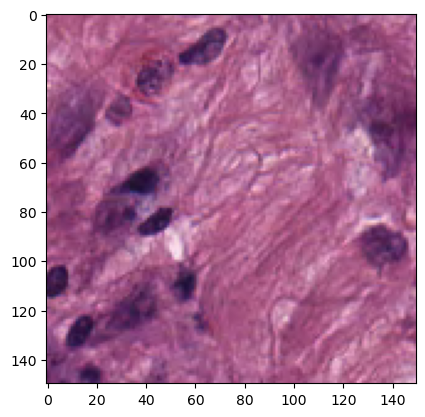

In [9]:
# plot sample image to check if import worked

import matplotlib.pyplot as plt

for image in images:
    plt.imshow(image)
    break

In [10]:
# create train / test spilt and save as np.array file

from sklearn.model_selection import train_test_split
import numpy as np
from numpy import savez_compressed

# Split the data and labels into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Data training set: \n", data_train.shape)
print("Labels training set: \n", labels_train.shape)
print("Data testing set: \n", data_test.shape)
print("Labels testing set: \n", labels_test.shape)

savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/data_train.npz', data_train)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/labels_train.npz', labels_train)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/data_test.npz', data_test)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/labels_test.npz', labels_test)


Data training set: 
 (4000, 150, 150, 3)
Labels training set: 
 (4000,)
Data testing set: 
 (1000, 150, 150, 3)
Labels testing set: 
 (1000,)


In [11]:
# define function to plot matrix of images and labels

def plot_imgs(img, label, n):
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # set title to corresponding label
        plt.title(label[i])
        # plot raw pixel data
        plt.imshow(img[i])
    plt.show()

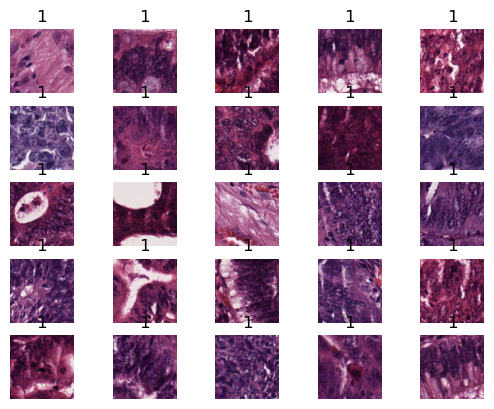

In [12]:
plot_imgs(images,labels, 5)

## Convert Large Images to np.arrray

In [13]:
# Convert Large Images to np.array
def load_large_images (path):
    images = list()
    for filename in listdir(path):
        print(filename)
        # load the image
        pixels = load_image(path + "/" + filename)
        # store
        images.append(pixels)
        print(len(images), pixels.shape)
    
    return asarray(images)

In [14]:
# save large images as np.array

lare_img_path = "/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/large_images"

large_imgs = load_large_images(lare_img_path)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/large_imgs.npz', large_imgs)

CRC-Prim-HE-06_APPLICATION.tif
1 (5000, 5000, 3)
CRC-Prim-HE-10_APPLICATION.tif
2 (5000, 5000, 3)
CRC-Prim-HE-02-APPLICATION.tif
3 (5000, 5000, 3)
CRC-Prim-HE-09_APPLICATION.tif
4 (5000, 5000, 3)
CRC-Prim-HE-01_APPLICATION.tif
5 (5000, 5000, 3)
CRC-Prim-HE-07_APPLICATION.tif
6 (5000, 5000, 3)
CRC-Prim-HE-08_APPLICATION.tif
7 (5000, 5000, 3)
CRC-Prim-HE-05_APPLICATION.tif
8 (5000, 5000, 3)
CRC-Prim-HE-04_APPLICATION.tif
9 (5000, 5000, 3)
CRC-Prim-HE-03_APPLICATION.tif
10 (5000, 5000, 3)


## Load Sub-Images

In [15]:
# define function to slice images -> 150*150 = 9 * 50 * 50

def s_imgs_data(images):
    arr = images

    # Get 9 smaller images from each 150x150 image
    images_s = [arr[:, i:i+50, j:j+50, :] for i in range(0, 150, 50) for j in range(0, 150, 50)]

    # Stack the images to create a new array
    images_s = np.stack(images_s, axis=1)

    # Reshape the resulting array to (5000, 9, 50, 50, 3)
    images_s = images_s.reshape(5000, 9, 50, 50, 3)

    # Concatenate the arrays along the first axis
    images_s = np.concatenate(np.split(images_s, 5000), axis=1)

    # The final array will have shape (45000, 50, 50, 3)
    images_s = images_s[0]
    print("Image slicing completed! New array: ", images_s.shape)
    return images_s

In [16]:
small_images = s_imgs_data(images)

Image slicing completed! New array:  (45000, 50, 50, 3)


In [17]:
# define function to create new array with labels

def get_s_label(label):
    s_labels = list()
    for label in labels:
        for i in range(9):
            s_labels.append(label)
    print("New Labeling completed! New array:", len(s_labels))
    return asarray(s_labels)

In [18]:
# shape of old labels
labels.shape

(5000,)

In [19]:
# create new array
s_labels = get_s_label(labels)

New Labeling completed! New array: 45000


In [20]:
# check shape of new array
s_labels.shape

(45000,)

In [22]:
# save new arrays

savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_sub_imgs.npz', small_images)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/all_sub_lables.npz', s_labels)

In [23]:
# define function to plot sub_imgs
def plot_s_imgs(img, n):
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(img[i])
    plt.show()

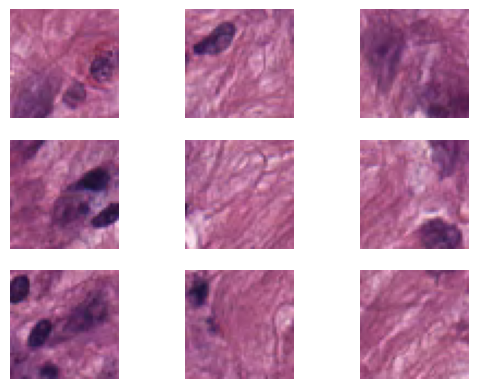

In [25]:
# plot all subimages from one 150*150 -> select n = 3 (e.g. 9 subimages make up one 150*150 images)

plot_s_imgs(small_images, 3)

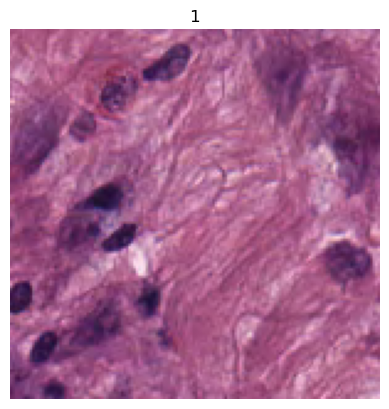

In [26]:
# plot the corresponding sub image to verify slicing
plot_imgs(images,labels, 1)

In [27]:
# print shape of new image and label arrays

print(small_images.shape)
s_labels.shape

(45000, 50, 50, 3)


(45000,)

### Train / Test Split

In [28]:
# Train Test Split for Subimages

# Split the data and labels into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(small_images, s_labels, test_size=0.2, random_state=42)

print("Data training set: \n", data_train.shape)
print("Labels training set: \n", labels_train.shape)
print("Data testing set: \n", data_test.shape)
print("Labels testing set: \n", labels_test.shape)

# save newly created arrrays for sub images

savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_data_train.npz', data_train)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_labels_train.npz', labels_train)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_data_test.npz', data_test)
savez_compressed('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_labels_test.npz', labels_test)



Data training set: 
 (36000, 50, 50, 3)
Labels training set: 
 (36000,)
Data testing set: 
 (9000, 50, 50, 3)
Labels testing set: 
 (9000,)


In [29]:
# load the prepared dataset -> test part of subimages to verify
from numpy import load
# load the prepared dataset
data = load('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_data_test.npz')
images = data['arr_0']
label_data = load('/Users/andrintschan/SWITCHdrive/ComputerVision/ProjectWork/data/sub_labels_test.npz')
labels = label_data['arr_0']
print('Loaded: ', images.shape)
print('Loaded: ', labels.shape)

Loaded:  (9000, 50, 50, 3)
Loaded:  (9000,)


In [31]:
# print shape of one sub image
for i in images:
    print(i.shape)
    break

(50, 50, 3)


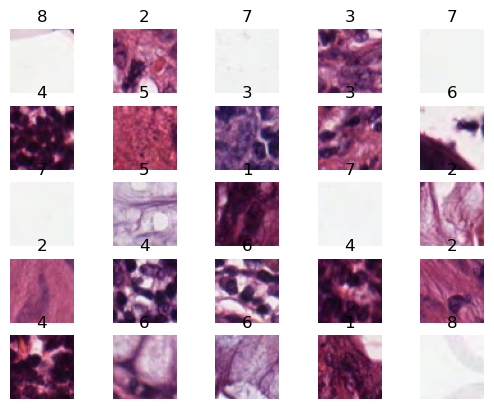

In [30]:
# plot the first 25 sub iamges (n = 5) -> shuffeled due to train / test split
plot_imgs(images,labels, 5)